In [46]:
# !pip install ffmpeg-python

In [47]:

# !pip install pixiedust

In [48]:
# 標準使用ライブラリー
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc
import os
import shutil

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import json
import datetime
import math
plt.style.use('dark_background')

# debug
#%pdb on

import pixiedust #%pixie_debugger

In [49]:
from pathlib import Path
import ffmpeg

In [50]:
MOVIE_DIR = Path("/home/input/yolov3_trial/movies_cut")
# MOVIE2IMG_DIR = Path( "/home/input/yolov3_trial/images_output/")
MOVIE2IMG_DIR = Path( "/home/input/yolov3_trial/images_output_bottom/")


In [51]:
##################################
#  独自ライブラリー： mshow
# (複数に対応したノートブック上画像表示)
##################################
import cv2;import numpy as np;import matplotlib as mpl;import matplotlib.pyplot as plt
%matplotlib inline
def mshow(img1=None, img2=None, img3=None, img4=None, img5=None, *, img_list = []):

    imgs = list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5])) 
    imgs.extend(img_list)
    
    if len(imgs) == 1:
        # 一枚のとき
        imgs[0] = imgs[0].astype(np.uint8)
        im4p = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
        plt.imshow(im4p)

    elif len(imgs) < 10:
        # 複数枚のとき。横に並べていく
        plt.figure(figsize=(len(imgs)*4, len(imgs)*4))
        fig_exh_base = 100+len(imgs)*10
        for idx, tmp_img in enumerate(imgs):
            tmp_img = tmp_img.astype(np.uint8)
            tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(fig_exh_base+idx+1)
            plt.imshow(tmp_im4p)
        
    else :
        plt.figure(figsize=(4*4, 4*4))
        for i in range(5):
            for j in range(5):
                
                if len(imgs) < 5*i+j+1:
                    break
                tmp_img = imgs[5*i+j].astype(np.uint8)
                tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
                
                
                plt.subplot2grid((5,5), (i,j))
                plt.imshow(tmp_im4p)
        

In [52]:
stream = ffmpeg.input(str(MOVIE_DIR) + "/0921_1649out.mp4")

In [53]:
###########################
# 動画読み込みチェック
###########################
import cv2;
def checkMoviePerSec ( stream , movie_duration = 1) : 
    tmp_dir =  Path("./tmp_img") # 画像を仮保存する

    # 存在チェック、中の画像を一度空に
    if not os.path.exists(str(tmp_dir)):
        os.mkdir(str(tmp_dir))
    for f in tmp_dir.glob("*.jpg"):
        f.unlink()

    # 動画の尺。25秒以上のものは、25秒まで。 
    check_duration = movie_duration if movie_duration < 25 else 25
    
    # 1秒ずつ、そのタイミングの画像を保存
    for sec in range(1, check_duration):
        ffmpeg.output(stream, str(tmp_dir)+"/" + str(sec)  +".jpg", ss=sec, vframes=1, f='image2').run()

    imgs = [] #画像をいれるリスト
    for idx in range(1, check_duration):
        tmp_img = cv2.imread(str(tmp_dir) + "/" +str(idx)+".jpg" )
        imgs.append( tmp_img   )
    
    # open cvで読み込んだ画像を並べて表示
    mshow(img_list = imgs)
    return imgs


In [54]:
str(MOVIE_DIR) + "/0911_1610out.mp4"


'/home/input/yolov3_trial/movies_cut/0911_1610out.mp4'

In [55]:
!ls /home/input/yolov3_trial/movies_cut/0921_1649out.mp4

/home/input/yolov3_trial/movies_cut/0921_1649out.mp4


In [56]:
stream = ffmpeg.input(str(MOVIE_DIR) + "/0921_1649out.mp4")

In [57]:
probe = ffmpeg.probe(str(MOVIE_DIR) + "/0921_1649out.mp4")

# movie_duration = math.floor(float(probe['streams'][0]["duration"]))

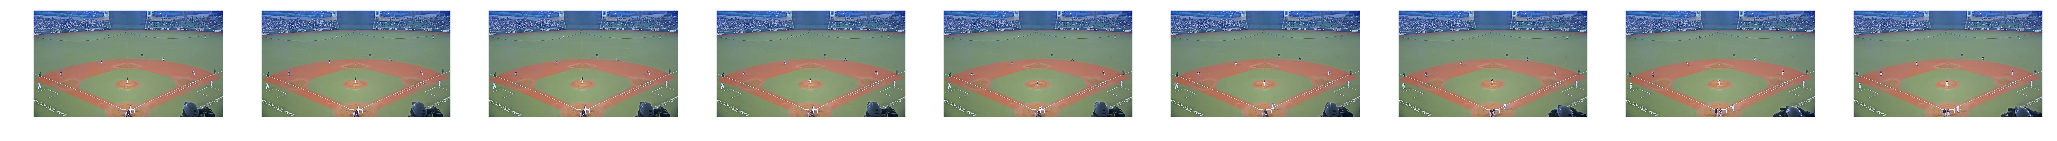

In [58]:
imgs =checkMoviePerSec(stream, 10)

In [59]:
# mshow(imgs[0])

In [60]:
# 画像を空にする
for f in MOVIE2IMG_DIR.glob("*.jpg"):
    f.unlink()

In [ ]:
stream.output(
    filename=str(MOVIE2IMG_DIR / "%06d.jpg"), ss=0, r=30000/1001, start_number=000000)\
    .run()
#     filename= str("/home/input/openpose_tryout/movies_output/")+"%06d.jpg", ss=0, r=30000/1001, start_number=000000)\
#     filename= "/home/input/openpose_tryout/movies/"+"%06d.jpg", ss=0, r=30000/1001, start_number=000000)\
#     filename= "/home/input/openpose_tryout/movies/1.jpg", ss=0, r=30000/1001) \
